### IMPORT

In [1]:
import pandas as pd
import numpy as np

#directory = '/content/drive/My Drive/progetto stat learning/tabelle'
directory = 'C:\\Users\\Admin\\Documents\\University\\DataScience\\Statistical_data_analysis\\progetto_esame_modB\\SerieA\\spi_tables_csv'
file = 'tmpdf.csv'
df = pd.read_csv(f'{directory}/{file}')

print(df.shape)
df.head(5)

(60, 133)


season      Squad  # Pl  Gls  Ast  Gls_90  Ast_90    xG    xA  xG_90  ...  \
0  2017/18   Atalanta    25   57   38    1.50    1.00  67.5  42.9   1.78  ...   
1  2017/18  Benevento    41   32   23    0.84    0.61  39.1  27.9   1.03  ...   
2  2017/18    Bologna    30   37   18    0.97    0.47  37.5  23.9   0.99  ...   
3  2017/18   Cagliari    29   33   21    0.87    0.55  41.1  25.9   1.08  ...   
4  2017/18     Chievo    25   36   20    0.95    0.53  33.3  22.6   0.88  ...   

   Megs  Carries  TotDist.1  PrgDist.1   Targ    Rec  Rec%  Miscon  Dispos  \
0    16    17534     105105      56208  19093  16813  88.1     553     554   
1    30    14878      96650      54783  16300  14168  86.9     472     470   
2    19    14001      81223      43305  15943  13638  85.5     558     461   
3    11    12282      66949      35167  14590  12167  83.4     475     393   
4     7    12953      71442      36573  14883  12575  84.5     412     416   

     SPI  
0  77.84  
1  46.68  
2  53.93  
3  50.78  
4  52.54  

[5 rows x 133 columns]

In [2]:
shape = df.shape
features = list(df.columns[3:(shape[1]-1)])

# Separating out the features
x = df.loc[:, features].values
#print(np.mean(x, axis=0))
#print(np.std(x, axis=0))

y = df.loc[:, 'SPI'].values

In [3]:
#CORRELAZIONE CON SPI
corr_df = df.iloc[:,3:].corr()
corr_df.iloc[:,-1]

Gls       0.845282
Ast       0.791934
Gls_90    0.832582
Ast_90    0.780886
xG        0.885855
            ...   
Rec       0.782602
Rec%      0.659928
Miscon    0.044262
Dispos   -0.040450
SPI       1.000000
Name: SPI, Length: 130, dtype: float64

In [4]:
import matplotlib.pyplot as plt

corr_df = df.iloc[:,1:]

#https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas
corr = corr_df.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None)\
    .set_properties(**{'max-width': '10px', 'font-size': '10pt'})\
    .set_precision(2)

## calculating and plotting the correlation coeff's using a seaborn heatmap
#corr = corr_df.corr()
#sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='coolwarm')

#You can use pyplot.matshow() from matplotlib
#f = plt.figure(figsize=(10, 10))
#plt.matshow(corr_df.corr(), fignum=f.number)
#plt.xticks(range(corr_df.shape[1]), corr_df.columns, fontsize=8, rotation=90)
#plt.yticks(range(corr_df.shape[1]), corr_df.columns, fontsize=8)
#cb = plt.colorbar()
#cb.ax.tick_params(labelsize=14)
##plt.title('Correlation Matrix', fontsize=16)
#plt.show()

#
#from string import ascii_letters
#import seaborn as sns
#import matplotlib.pyplot as plt
#sns.set(style="white")
## Generate a mask for the upper triangle
#mask = np.triu(np.ones_like(corr_matrix, dtype=np.bool))
## Set up the matplotlib figure
#f, ax = plt.subplots(figsize=(11, 9))
## Generate a custom diverging colormap
#cmap = sns.diverging_palette(220, 10, as_cmap=True)
## Draw the heatmap with the mask and correct aspect ratio
#sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
#            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# LINEAR REGRESSION MODELS

In [5]:
#simple regression model
#using the most correlated feature: SCA 0.91
from sklearn.linear_model import LinearRegression

xs = df.loc[:, 'SCA'].values
xs = xs.reshape(-1, 1)
ys = df.loc[:, 'SPI'].values
simple_reg = LinearRegression().fit(xs, ys)
# The coefficients
print('Coefficients: \n', simple_reg.coef_)
# The intercept
print('Intercept: \n', simple_reg.intercept_)
# The score
print('Score: \n', simple_reg.score(xs, ys))
#print(simple_reg.score(xs, ys), 1 - (1-simple_reg.score(xs, ys))*(len(ys)-1)/(len(ys)-xs.shape[1]-1))

Coefficients: 
 [0.06372164]
Intercept: 
 15.039043611458077
Score: 
 0.8220355410619421


<function matplotlib.pyplot.show(*args, **kw)>

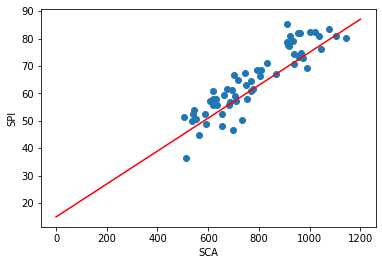

In [8]:
#plot
import matplotlib.pyplot as plt

plt.scatter(xs,ys)
plt.xlabel('SCA')
plt.ylabel('SPI')
lr_x = np.linspace(0,1200,1000)
lr_y = 0.06*lr_x + 15.04
plt.plot(lr_x, lr_y, '-r', label='y=0.06*x+15.04')

plt.show

In [9]:
#multiple regression model including all features
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x, y)
# The coefficients
print('Coefficients: \n', reg.coef_)
# The intercept
print('Intercept: \n', reg.intercept_)
# The score
print('Score: \n', reg.score(x, y))

# SST = SSR + SSE
#https://stackoverflow.com/questions/42033720/python-sklearn-multiple-linear-regression-display-r-squared

model = LinearRegression()
model.fit(x,y)

# compute with formulas from the theory
yhat = model.predict(x)
SS_Residual = sum((y-yhat)**2)       
SS_Total = sum((y-np.mean(y))**2)     
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1)
print(f"R^2: {r_squared:.3f},\nR^2_adj: {adjusted_r_squared:.3f}")

# compute with sklearn linear_model, although could not find any function to compute adjusted-r-square directly from documentation
#print(model.score(x, y), 1 - (1-model.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1))

Coefficients: 
 [ 2.00206150e-02  5.29651642e-03  5.00218666e-04  1.12932073e-04
 -2.98332534e-03 -2.17322115e-03 -8.90758029e-05 -5.72106572e-05
  2.69888420e-03 -2.84354772e-03 -7.56680418e-04 -2.12965008e-03
 -4.96022626e-03 -9.77291797e-03  9.75489270e-04 -2.85712824e-04
 -2.09740691e-04  5.44618909e-05  1.68348419e-04  2.16117028e-02
  5.92846665e-04  1.89733091e-02  7.29235429e-03 -1.19110234e-03
 -1.26823057e-02  6.57334751e-03  4.55020754e-02  1.22224309e-03
  2.84998224e-02  2.91678233e-03  3.73455198e-03  1.54673795e-03
  6.15808085e-03  2.64609997e-03  4.05408873e-02 -9.68061466e-03
  2.60404987e-02  2.75268141e-02 -1.30264254e-02 -3.04736447e-02
 -4.90090723e-02 -1.54504578e-03 -1.85354276e-02  1.86470100e-03
  2.48860974e-02  2.72604795e-04 -4.71492218e-03  5.99360468e-03
  5.86018496e-04 -7.79247367e-03 -3.67735665e-02 -5.67683039e-03
  2.89810928e-02  9.44990010e-04 -3.00373843e-03  6.15669364e-03
 -4.11880255e-02  2.16072582e-02 -4.44215011e-03 -1.16165757e-02
 -1.90012

In [10]:
#https://stackoverflow.com/questions/44495667/calculate-p-value-in-sklearn-using-python
#pip install regressors
from regressors import stats

#stats.adj_r2_score(reg, x, y)

# To calculate the p-values of beta coefficients: 
print("coef_pval:\n", stats.coef_pval(reg, x, y))
# to print summary table:
print("\n=========== SUMMARY ===========")
xlabels = features
stats.summary(reg, x, y, xlabels)

coef_pval:
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.38771095e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 9.26628897e-01 5.76476411e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e

C:\Users\Admin\Anaconda3\lib\site-packages\regressors\stats.py:217: RuntimeWarning: divide by zero encountered in double_scalars
  return (r_squared / p) / ((1 - r_squared) / (n - p - 1))


### LASSO

In [24]:
from sklearn.linear_model import Lasso

reg_lasso = Lasso(alpha=0.1, max_iter=10000)
reg_lasso.fit(x,y)

# The coefficients
print('Coefficients: \n', reg_lasso.coef_)
# The intercept
print('Intercept: \n', reg_lasso.intercept_)
#R^2
print(f"R^2: {reg_lasso.score(x, y):.3f},\nR^2_adj: {1 - (1-reg_lasso.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1):.3f}")

Coefficients: 
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -5.31239536e-02 -0.00000000e+00 -0.00000000e+00 -2.92266868e-02
 -1.08729956e-01 -8.51637633e-02 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  3.84414444e-02
  0.00000000e+00  5.28459891e-02  0.00000000e+00 -5.32222012e-02
 -1.82252705e-02  3.56014294e-02  1.80745831e-01  0.00000000e+00
  1.08535247e-01 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  5.59029753e-02 -5.60721817e-02
  5.97624109e-02  1.05215889e-01 -5.82639291e-02 -6.10317507e-02
 -6.31626089e-02 -0.00000000e+00 -0.00000000e+00  7.55210854e-03
 -2.98473303e-03 -0.00000000e+00  5.57309269e-03 -4.89588637e-03
  1.76167415e-03 -1.11910991e-02 -4.56424093e-03 -1.24735335e-01
 -0.00000000e+00 -1.12310775e-03 -5.07666954e-03 -0.00000000e+00
 -3.99526684e-02  2.01994665e-03 -3.78817083e-01 -2.26266740e-02
 -0.00000

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.063444138375319, tolerance: 0.8482811285
  positive)


In [18]:
from regressors import stats

# To calculate the p-values of beta coefficients: 
print("coef_pval:\n", stats.coef_pval(reg_lasso, x, y))
# to print summary table:
print("\n=========== SUMMARY ===========")
xlabels = features
stats.summary(reg_lasso, x, y, xlabels)

coef_pval:
 [0.99999417 1.         1.         1.         1.         1.
 1.         1.         1.         0.99997679 1.         1.
 0.99996762 0.99987971 0.99999329 1.         1.         1.
 1.         1.         0.99990565 1.         0.99984131 1.
 0.9999918  0.99999668 0.99999009 0.99996709 1.         0.99998266
 1.         1.         1.         1.         1.         0.99990932
 0.99993236 0.99994974 0.99993681 0.99997276 0.99993112 0.99992678
 1.         1.         0.9999597  0.99993469 1.         0.99996211
 0.99997408 0.99998882 0.99987842 0.99999381 0.99999274 1.
 0.99999553 0.99994587 1.         0.99986415 0.99999434 0.99997116
 0.99999142 1.         1.         0.99991468 0.99997526 0.99999893
 1.         0.99978047 0.99943342 0.99997792 0.9999916  0.99994805
 0.99999669 0.99999987 1.         0.99994518 0.99988191 0.99999994
 0.99998065 0.99999157 0.99999703 0.99999964 0.9999583  0.9999286
 0.99978908 0.99997472 0.99995724 0.99992251 1.         0.99951142
 0.99990776 0.99955703 0

In [33]:
from sklearn.linear_model import LassoCV

reg_lasso_CV = LassoCV(cv=5, max_iter=10000).fit(x, y)
reg_lasso_CV.score(x, y)
stats.summary(reg_lasso_CV, x, y, xlabels)

Residuals:
     Min      1Q  Median      3Q     Max
-10.0803 -3.5222 -0.6387  3.1719  11.997


Coefficients:
                 Estimate                  Std. Error             t value   p value
_intercept      33.195368  2.906190e+07-2.536931e+06j  0.000000+0.000000j  0.999999
Gls              0.000000  2.227100e+05+7.369628e+04j  0.000000+0.000000j  1.000000
Ast              0.000000  2.353389e+05+4.796135e+04j  0.000000+0.000000j  1.000000
Gls_90           0.000000  6.929523e+06+1.300530e+07j  0.000000+0.000000j  1.000000
Ast_90           0.000000  1.500767e+07-2.252263e+06j  0.000000+0.000000j  1.000000
xG               0.000000  2.456039e+05+9.703135e+04j  0.000000+0.000000j  1.000000
xA               0.000000  2.470968e+05+1.021066e+05j  0.000000+0.000000j  1.000000
xG_90            0.000000  2.347756e+06+3.529016e+06j  0.000000+0.000000j  1.000000
xA_90            0.000000  2.755841e+07-3.764908e+05j  0.000000+0.000000j  1.000000
Off              0.000000  4.027155e+04-6.397422e+0

In [34]:
reg_lasso_CV.alpha_

357.78252753333317

In [27]:
#https://scikit-learn.org/stable/modules/cross_validation.html
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

#values = np.linspace(0,5,500)
values = 10**np.linspace(3,-2,1000)*0.5
results = []
for alpha in values:
    #print(f'Alpha: {alpha}')
    reg_lasso = Lasso(alpha=alpha, max_iter=10000)
    scores = cross_val_score(reg_lasso, x, y, cv=5)
    score = np.sum(scores)/scores.shape
    results.append((alpha,score))
#print(results)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9079313167699183, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4387197030905554, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.3763976849370465, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9898114651645074, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.140715470296527, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.2967531878324507, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.12667479291099, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.539395767703581, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 74.39391970576196, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65.92369274928438, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47.751731805071756, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.0540870942290894, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.52952600118715, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22.35087442998588, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.898199919274361, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 117.65791035308686, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 200.3744116565299, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27.718829909113936, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 146.34423047277673, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 260.2911144847268, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.9068291972082534, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 158.38830856538777, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 164.5698847490802, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 194.13028901880358, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 256.79854340462254, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 164.1860882284343, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22.36625352177481, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 139.5715568664482, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 88.85879098659115, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 45.9279782753361, tolerance: 0.7196650481249999
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 119.12878264329629, tolerance: 0.7196650481249999
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9861071004847872, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 295.6971789953749, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60.164419290774845, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 243.77870062840103, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 116.20829499747452, tolerance: 0.7196650481249999
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 301.6538988273388, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 104.02341853224488, tolerance: 0.7196650481249999
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42.219051170048715, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 271.02472217223163, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 275.96761219283866, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 307.68821737598955, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 271.72429545501967, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 321.53002589577284, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 74.34138557637868, tolerance: 0.7196650481249999
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 314.7487317477031, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 198.3339775494029, tolerance: 0.7196650481249999
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 243.548732767562, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 247.38160841595024, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 276.1402103588732, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 306.95083542076816, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 268.71663895419465, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 309.4445055343075, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 295.3537814435182, tolerance: 0.7196650481249999
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 299.99066724636634, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 288.1879295938693, tolerance: 0.7196650481249999
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 282.7781490891797, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 236.10035081185245, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 253.4713300799306, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 288.1825655544669, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 277.56299227965013, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 271.30686655649043, tolerance: 0.7196650481249999
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 280.7736728288377, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 263.88635743294344, tolerance: 0.7196650481249999
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 271.7160904744072, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 223.08032325574672, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 215.30260976473454, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 224.94238104025715, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 253.38877361382904, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 260.54482287079543, tolerance: 0.7196650481249999
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 253.42619881787837, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 206.97995729368444, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 199.16570308185237, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 210.36210836771784, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 184.34931452662795, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 200.11732768261734, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 150.15661571728123, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 247.5941314760621, tolerance: 0.7196650481249999
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 174.07288680365616, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 237.46129538106308, tolerance: 0.7196650481249999
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 225.8095595218495, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 227.55114635286776, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 149.72051353653114, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 181.26274549423638, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 138.40948145947175, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 171.2383906872982, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 207.12719120808623, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 212.2585149879185, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 201.35214700483974, tolerance: 0.7196650481249999
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 208.52719739389295, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 205.4015806351578, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 151.39907741103053, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 159.9224015931531, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 143.33890885234234, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 155.24404964290497, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 207.28053842473776, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 149.74864111762975, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 201.28484883424653, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 153.7187830913066, tolerance: 0.7196650481249999
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 156.59753913854382, tolerance: 0.7196650481249999
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 196.49599948873728, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 142.9061576100462, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 139.59262540299028, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 136.79084130764716, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 185.5930340858495, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 178.67344454181762, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 154.14133574003523, tolerance: 0.7196650481249999
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 184.75902769491472, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 178.24187043175615, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 135.18465477071265, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 123.76001122900959, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 113.18721140379776, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 163.50925187933086, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 156.26972887246296, tolerance: 0.7196650481249999
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 149.90370383708006, tolerance: 0.7196650481249999
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 164.6486526286858, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 126.75240329038517, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 157.34496787154262, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 122.11408589452967, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 103.38532921629604, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 117.60800015478506, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 99.1846125570899, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 142.01878459248655, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 135.1274331658129, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 134.82965550831466, tolerance: 0.7196650481249999
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 142.6021838806015, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 135.79478866720703, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 108.56469944094513, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 91.0474550230424, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 104.3595787130102, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 88.91154109636744, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 121.0459603048154, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality ga

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 114.83833873266875, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 118.49200928800681, tolerance: 0.7196650481249999
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 123.19299365447321, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 117.69466090576812, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 95.23015794300778, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 81.33451628285096, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77.71318453455433, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 102.36745136208475, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 107.1668142313266, tolerance: 0.7196650481249999
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 102.5822714582583, tolerance: 0.7196650481249999
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 106.76195091613654, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 86.42000264241436, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 82.56251419211551, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 69.8464686051427, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90.85770024501663, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 66.3020387658342, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 85.89765786467983, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 91.94667422299912, tolerance: 0.7196650481249999
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 81.1654966665578, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87.16823582678025, tolerance: 0.7196650481249999
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 91.9101400580794, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap:

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87.31322952459031, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 71.28283958872548, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59.08578980636132, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality ga

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67.9752260002358, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55.92347049258211, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 71.72693099322132, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67.69944939732386, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73.07201613467417, tolerance: 0.7196650481249999
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 77.90454131022356, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality ga

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 73.85155990331334, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 61.103195649736826, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49.84300940453034, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47.255558471508614, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59.77823161219147, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 64.53653319850486, tolerance: 0.7196650481249999
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60.8611993192968, tolerance: 0.7196650481249999
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 65.7465376769839, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 54.715694481348805, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 51.92822179483092, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42.063383213025375, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 52.7772606714232, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality ga

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 49.831684554131606, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 53.60221314104138, tolerance: 0.7196650481249999
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 58.23951270097791, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55.03019231023718, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46.32577250523058, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37.42817041245831, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality ga

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43.94118854847767, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35.45813864936686, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 43.9505577302098, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 41.46506239125641, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44.37205048868035, tolerance: 0.7196650481249999
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 48.78155612391792, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality ga

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46.05032971345568, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 39.19910815702308, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31.64915123278668, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality ga

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30.064819891184545, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36.5928926904982, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38.90837251890989, tolerance: 0.7196650481249999
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality ga

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 34.50708038756129, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36.69662741387199, tolerance: 0.7196650481249999
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 40.566890519535754, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 38.25029559463817, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33.04336037306288, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26.85088777269431, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality ga

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30.351222769682245, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 32.32210256445587, tolerance: 0.7196650481249999
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35.83583895865804, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 33.893615861916636, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29.297617189606477, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23.875682997381976, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22.583714197571805, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26.658154178637975, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.325504614578637, tolerance: 0.7196650481249999
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26.682809658984723, tolerance: 0.7196650481249999
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 30.013974632986194, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26.01950254017182, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 24.605623713310198, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.00272190499829, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23.408047432198778, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22.038854837560656, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23.486196499062114, tolerance: 0.7196650481249999
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26.522815901774067, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 25.038341071189, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 21.828093395141586, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 17.693099824930897, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality ga

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.69922658170856, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.316906405676953, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 20.617259135690638, tolerance: 0.7196650481249999
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.404025931868414, tolerance: 0.7196650481249999
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 22.102002809400965, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.43426842625266, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.42387012512887, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.688256299944594, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.927443044383207, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15.94057084861105, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.99234225321486, tolerance: 0.7196650481249999
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 19.62649112631501, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality ga

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18.608045366073423, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.351620653413505, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.866316945764437, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.09795224601608, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.000916363247844, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.844689883104936, tolerance: 0.7196650481249999
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.94499949842544, tolerance: 0.7196650481249999
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16.557730626020433, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.479553356130156, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.734239949867296, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.581643276713166, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.402679570857403, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.739905777932556, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.209622741215604, tolerance: 0.7196650481249999
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.70070439146889, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13.943542717775419, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.329344206818345, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.291839530613126, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.746238490077205, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.39132163108076, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.703797320373686, tolerance: 0.7196650481249999
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.817492280886741, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.082725119667042, tolerance: 0.7196650481249999
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.483016424787401, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.85402832160812, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.542941728675228, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.662231162902967, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.2204751472117, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.67845152180925, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.885779427613873, tolerance: 0.7196650481249999
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.38113883074913, tolerance: 0.7196650481249999
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10.610693777122925, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.527413207832101, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality ga

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9.08918846397565, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.394391003156332, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.665119913277494, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.062266078146106, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.257688959735841, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.446857226029136, tolerance: 0.7196650481249999
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality ga

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.071835499208538, tolerance: 0.7196650481249999
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.955654694013084, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.167049452145177, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality ga

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.7517952630504565, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.48795046318833, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.45778375409718, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.113384364116806, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.366084291474748, tolerance: 0.7196650481249999
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.929687320082358, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality ga

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.485937186541418, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.9036493634915725, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.029290204244013, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.820672364062293, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.4471105298788975, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.814944419402581, tolerance: 0.7196650481249999
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.570301083110237, tolerance: 0.7196650481249999
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.6023499629220455, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.136790570258583, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.226607948427088, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.810397449607849, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.447800117677869, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality ga

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.278276441359312, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.795697599497487, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.037200798506411, tolerance: 0.7196650481249999
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality ga

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.803198285794109, tolerance: 0.7196650481249999
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.4862866009844815, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.197736203735742, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.930524577859446, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.9902536073536625, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.416215146177209, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.241001710982233, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.30744593436892, tolerance: 0.7196650481249999
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.874690279716418, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.6258697034962095, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.395669100057446, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.8184262161941662, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.713737857497908, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.935940531319614, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.853606926833022, tolerance: 0.7196650481249999
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality ga

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.671848215536257, tolerance: 0.7196650481249999
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.1365010566108475, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.992969350041836, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.8403851640706246, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.455545917013098, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.7060459921912625, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.325010383675503, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.605479289093322, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.34402798750635, tolerance: 0.7196650481249999
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.493482727167056, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.214696994582627, tolerance: 0.7196650481249999
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.477143747340598, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality ga

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.287214676653718, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.435662604926185, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.0321573581872476, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.896524424424939, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.2231524761051293, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.9429579596177162, tolerance: 0.7196650481249999
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.092813811550525, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.8161125977855286, tolerance: 0.7196650481249999
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.9265157689646593, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.7755180199771097, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.9995110828879774, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.6105072299287153, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.4845537879694732, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.832147291939772, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.571721569714617, tolerance: 0.7196650481249999
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.4765669301045965, tolerance: 0.7196650481249999
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.4707974701030446, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.7365215985971365, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.6345311356924124, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.2204834301955163, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.5662592597506273, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.446923812653593, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.334445612258887, tolerance: 0.7196650481249999
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.2125493545485186, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.2894133765602422, tolerance: 0.7196650481249999
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.098080502220031, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.4229121359104115, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.3367396286059434, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.878163994971178, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.2095741546482444, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.1088758498244182, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.1835725601343183, tolerance: 0.7196650481249999
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.871649634298434, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7835547464168326, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.1738057637094514, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.729569863429871, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.1169804796531357, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.6842189171653774, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.892415791238861, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.6395512526432268, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7975135893996128, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.0875118084253894, tolerance: 0.7196650481249999
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.0430580932281086, tolerance: 0.7196650481249999
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.541783245628189, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9917587575245166, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4747556868561138, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9423388455395352, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5536258560800154, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8964354009966622, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.504008301546454, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5169382748055344, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4397333360290154, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8522648237806574, tolerance: 0.7196650481249999
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3357977597298998, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2729467757167134, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8399962425539946, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3852917624041547, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.8030247437679636, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.32837517724464, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2822250663386303, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.218851532420895, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.669937629224143, tolerance: 0.7196650481249999
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1416074114274002, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.616575784519323, tolerance: 0.7196650481249999
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0845661537993707, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7034158031466682, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.648495221525933, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.17162743486373, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1066632107744305, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality ga

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0549810667670563, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.4915629193428706, tolerance: 0.7196650481249999
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9731695850594575, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9240881916173548, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.517870023289901, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0668671256043352, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality 

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0181336762970534, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.9453742815918132, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3630379882220616, tolerance: 0.7196650481249999
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8965381006159615, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3037993320001922, tolerance: 0.7196650481249999
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8298738559268858, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.245050106251597, tolerance: 0.7196650481249999
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7932749366260055, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.327038951218949, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.2762710921862452, tolerance: 0.5686927297916666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8951000624218534, tolerance: 0.6942170925000001
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7994025275580143, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7582654942642901, tolerance: 0.6971178791666668
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.1224041164223713, tolerance: 0.7196650481249999
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7268072333828549, tolerance: 0.7054912266666666
  positive)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality

(35.303588570688866, array([0.75661627]))


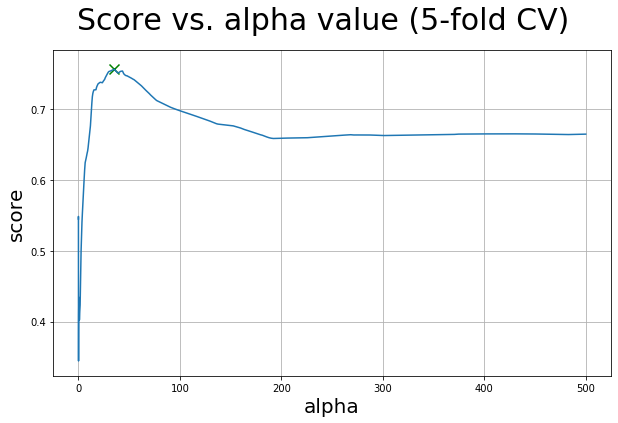

In [28]:
sorted_by_score = sorted(results, key=lambda tup: tup[1])
max_score = sorted_by_score[-1][1]
max_alpha = sorted_by_score[-1][0]
print(sorted_by_score[-1])

alpha_val = [couple[0] for couple in results]
score_val = [couple[1] for couple in results]

# Plotting
fig = plt.figure(figsize=(10,6))
fig.suptitle('Score vs. alpha value (5-fold CV)', fontsize=30)
#plt.title()
plt.xlabel('alpha', fontsize=20)
plt.ylabel('score', fontsize=20)
#plt.hlines(y=0.815,xmin=0,xmax=5.0,colors='red',linestyles='dashed')
plt.plot(alpha_val, score_val)
plt.grid(True)
plt.scatter(max_alpha, max_score, s=100, c='green', marker='x')
#plt.scatter(alpha_val, score_val)

### RIDGE

In [29]:
from sklearn.linear_model import Ridge

reg_ridge = Ridge(alpha=0.1)
reg_ridge.fit(x,y)

# The coefficients
print('Coefficients: \n', reg_ridge.coef_)
# The intercept
print('Intercept: \n', reg_ridge.intercept_)
#R^2
print(f"R^2: {reg_ridge.score(x, y):.3f},\nR^2_adj: {1 - (1-reg_ridge.score(x, y))*(len(y)-1)/(len(y)-x.shape[1]-1):.3f}")

# To calculate the p-values of beta coefficients: 
print("coef_pval:\n", stats.coef_pval(reg_ridge, x, y))
# to print summary table:
print("\n=========== SUMMARY ===========")
xlabels = features
stats.summary(reg_ridge, x, y, xlabels)

Coefficients: 
 [ 2.00203766e-02  5.29647552e-03  5.00212605e-04  1.12931566e-04
 -2.98324472e-03 -2.17315701e-03 -8.90733116e-05 -5.72090927e-05
  2.69869960e-03 -2.84338310e-03 -7.56591500e-04 -2.12957991e-03
 -4.95986887e-03 -9.77260841e-03  9.75517085e-04 -2.85703393e-04
 -2.09729105e-04  5.44608917e-05  1.68344732e-04  2.16113434e-02
  5.92839807e-04  1.89730071e-02  7.29249789e-03 -1.19140322e-03
 -1.26822506e-02  6.57348625e-03  4.55016392e-02  1.22223050e-03
  2.84996078e-02  2.91680657e-03  3.73468483e-03  1.54660619e-03
  6.15792787e-03  2.64600593e-03  4.05405973e-02 -9.68056699e-03
  2.60404401e-02  2.75259155e-02 -1.30257583e-02 -3.04732737e-02
 -4.90085594e-02 -1.54503046e-03 -1.85352857e-02  1.86473975e-03
  2.48857524e-02  2.72604770e-04 -4.71474019e-03  5.99345928e-03
  5.86020653e-04 -7.79213616e-03 -3.67724272e-02 -5.67676057e-03
  2.89802910e-02  9.44492730e-04 -3.00382442e-03  6.15640467e-03
 -4.11868784e-02  2.16066411e-02 -4.44199796e-03 -1.16163633e-02
 -1.90019

In [41]:
from sklearn.linear_model import RidgeCV

alphas=(0.1, 1.0, 5.0, 10.0, 50.0, 100.0, 500.0, 1000.0, 5000.0, 10000.0, 50000.0, 100000.0, 500000.0)

reg_ridge_CV = RidgeCV(alphas=alphas,cv=5).fit(x, y)
reg_ridge_CV.score(x, y)

0.933878996936463

In [42]:
reg_ridge_CV.alpha_

500000.0

In [40]:
values = np.linspace(0,100000,1000000)
results = []
for alpha in values:
    #print(f'Alpha: {alpha}')
    reg_ridge = Ridge(alpha=alpha)
    scores = cross_val_score(reg_ridge, x, y, cv=5)
    score = np.sum(scores)/scores.shape
    results.append((alpha,score))
#print(results)
sorted_by_score = sorted(results, key=lambda tup: tup[1])
max_score = sorted_by_score[-1][1]
max_alpha = sorted_by_score[-1][0]
print(sorted_by_score[-1])

alpha_val = [couple[0] for couple in results]
score_val = [couple[1] for couple in results]

# Plotting
fig = plt.figure(figsize=(10,6))
fig.suptitle('Score vs. alpha value (5-fold CV)', fontsize=30)
#plt.title()
plt.xlabel('alpha', fontsize=20)
plt.ylabel('score', fontsize=20)
#plt.hlines(y=0.815,xmin=0,xmax=5.0,colors='red',linestyles='dashed')
plt.plot(alpha_val, score_val)
plt.grid(True)
plt.scatter(max_alpha, max_score, s=100, c='green', marker='x')
#plt.scatter(alpha_val, score_val)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=2.72812e-17): result may not be accurate.
  overwrite_a=False)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=2.94588e-17): result may not be accurate.
  overwrite_a=False)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.88766e-18): result may not be accurate.
  overwrite_a=False)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.1428e-18): result may not be accurate.
  overwrite_a=False)
C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:189: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn("Singular matrix in solving dual problem. Using "


KeyboardInterrupt: 